In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
Data = pd.read_csv('E:\DSP 17\pratice paper\Classified - Data\Classified Data')
Data

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [3]:
Data.shape

(1000, 12)

In [4]:
Data['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [5]:
Data = Data.drop('Unnamed: 0', axis = 1)
Data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [6]:
Data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
Data.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [9]:
x = Data.drop('TARGET CLASS', axis = 1)
y = Data['TARGET CLASS']

In [10]:
# Train_size = 70

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state= 42)

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [12]:
knn_pred = knn.predict(x_test)

In [13]:
print("Confusion_Matrix :")
print(confusion_matrix(y_test,knn_pred))


print("Classification_report :")
print(classification_report(y_test,knn_pred))
 

Confusion_Matrix :
[[134   8]
 [ 12 146]]
Classification_report :
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.92      0.94       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [14]:
# Train_ size = 75

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state= 42)

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
knn_pred = knn.predict(x_test)

In [17]:
print("Confusion_Matrix :")
print(confusion_matrix(y_test,knn_pred))

print("Classification_report :")
print(classification_report(y_test,knn_pred))
 

Confusion_Matrix :
[[107   9]
 [  9 125]]
Classification_report :
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       116
           1       0.93      0.93      0.93       134

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(Data.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
scaled_features = scaler.transform(Data.drop('TARGET CLASS',axis=1))

In [21]:
Data_feat = pd.DataFrame(scaled_features,columns=Data.columns[:-1])
Data_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,Data['TARGET CLASS'],
                                                    test_size=0.30, random_state = 42)

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
pred = knn.predict(X_test)

In [26]:
print("Confusion_Matrix :")
print(confusion_matrix(y_test,pred))


print("Classification_report :")
print(classification_report(y_test,pred))
 

Confusion_Matrix :
[[134   8]
 [ 11 147]]
Classification_report :
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [27]:
# Train_ size = 75

X_train, X_test, y_train, y_test = train_test_split(scaled_features,Data['TARGET CLASS'],
                                                    test_size=0.25, random_state = 42)

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [29]:
knn_pred = knn.predict(X_test)

In [30]:
print("Confusion_Matrix :")
print(confusion_matrix(y_test,knn_pred))


print("Classification_report :")
print(classification_report(y_test,knn_pred))


Confusion_Matrix :
[[108   8]
 [  8 126]]
Classification_report :
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       116
           1       0.94      0.94      0.94       134

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [31]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error Rate')

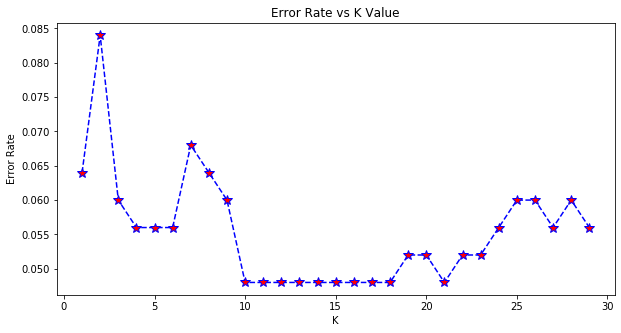

In [32]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30),error_rate,color='blue',ls='--',marker='*',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print("Confusion_Matrix :")
print(confusion_matrix(y_test,pred))
print("Classifisction_report :")
print('\n')
print(classification_report(y_test,pred))

WITH K=15


Confusion_Matrix :
[[110   6]
 [  6 128]]
Classifisction_report :


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       116
           1       0.96      0.96      0.96       134

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

